In [45]:
import pandas as pd
import gpxpy
from tqdm import tqdm
import folium
from config import vworld_key
import plotly.express as px
from datetime import datetime

In [6]:
def gpx_to_dataframe(gpx_file_path):
    with open(gpx_file_path, 'r', encoding='UTF8') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    data = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                data.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                    'elevation': point.elevation,
                    'time': point.time,
                })

    df = pd.DataFrame(data)
    return df

In [10]:
gpx_file_path = "./310merge.gpx"
gpx_dataframe = gpx_to_dataframe(gpx_file_path)
gpx_dataframe

,latitude,longitude,elevation,time
0,37.480920,127.075818,70.341154,2020-01-01 05:53:27+00:00
1,37.480936,127.075732,82.248637,2020-01-01 05:53:30+00:00
2,37.477193,127.074008,162.079531,2020-01-01 06:03:52+00:00
3,37.477173,127.074042,164.001846,2020-01-01 06:03:56+00:00
4,37.477133,127.074105,171.626745,2020-01-01 06:04:03+00:00
...,...,...,...,...
1202258,37.475914,127.058219,68.753296,2020-02-16 17:44:38+00:00
1202259,37.475866,127.058121,68.179199,2020-02-16 17:44:47+00:00
1202260,37.475823,127.058023,65.438477,2020-02-16 17:44:56+00:00
1202261,37.475743,127.057929,65.010437,2020-02-16 17:45:07+00:00


In [21]:
# 시간 데이터를 문자열로 변환
gpx_dataframe['time_str'] = gpx_dataframe['time'].astype(str)

# 시간 데이터를 파싱하여 새로운 열에 저장
gpx_dataframe['timestamp'] = gpx_dataframe['time_str'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S+00:00"))

# 요일을 추출하여 새로운 열에 저장 (0: 월요일, 1: 화요일, ..., 6: 일요일)
gpx_dataframe['weekday'] = gpx_dataframe['timestamp'].dt.weekday

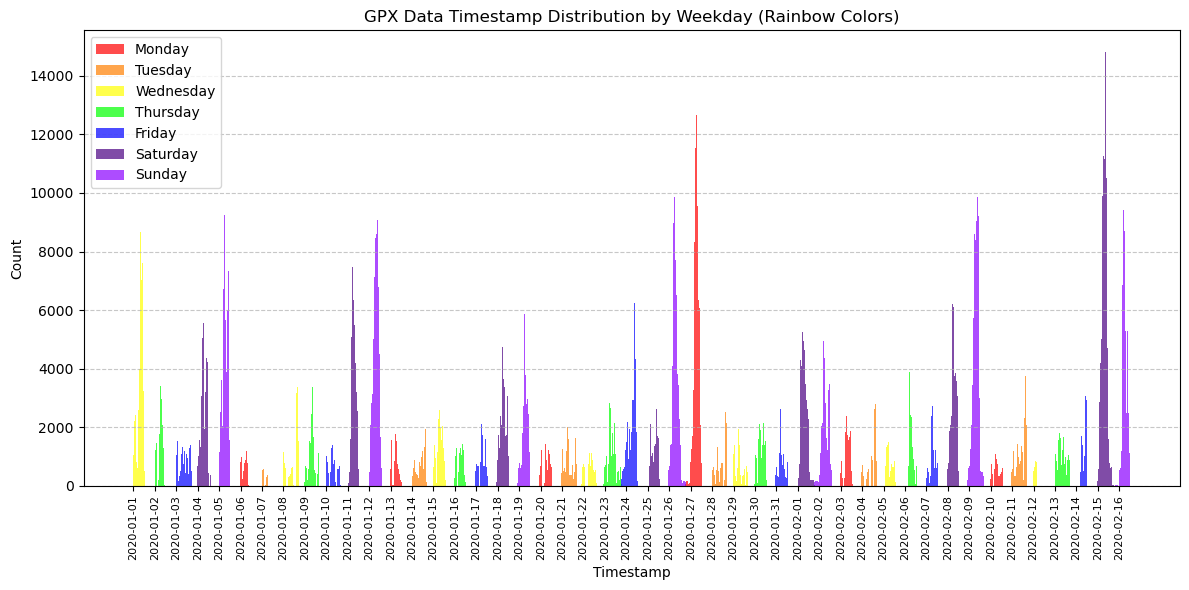

In [39]:
#요일 딕셔너리 정의
weekday_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# 요일에 따른 색상 무지개색 배치
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF']

# 요일별로 히스토그램 그리기
plt.figure(figsize=(12, 6))
for day, color in zip(range(7), rainbow_colors):
    day_data = gpx_dataframe[gpx_dataframe['weekday'] == day]
    plt.hist(day_data['timestamp'], bins=1000, color=color, alpha=0.7, label=weekday_dict[day])

plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('GPX Data Timestamp Distribution by Weekday (Rainbow Colors)')
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both'))
# x 축에 1일마다의 날짜 표시
x_ticks = pd.date_range(start=gpx_dataframe['timestamp'].min(), end=gpx_dataframe['timestamp'].max(), freq='D')
plt.xticks(x_ticks, labels=x_ticks.strftime('%Y-%m-%d'), fontsize=8, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# 요일별로 히스토그램 데이터 생성
hist_data = [gpx_dataframe[gpx_dataframe['weekday'] == day]['timestamp'] for day in tqdm(range(7))]

100%|██████████| 7/7 [00:00<00:00, 71.74it/s]


In [52]:
# 요일별 히스토그램 그리기
fig = px.histogram(hist_data, nbins=1000, color_discrete_sequence=rainbow_colors, labels={'timestamp': 'Timestamp'})
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='Count',
    title='GPX Data Timestamp Distribution by Weekday (Rainbow Colors)',
    xaxis_tickangle=-45,
    showlegend=True
)
fig.update_xaxes(type='category')  # 카테고리 형태로 x 축 표시
fig.show()

KeyboardInterrupt: 

In [7]:
gpx_file_path = "./dataset/1.2~2.16/2020-2-16_대모산-구룡산_20200216_101542(ifiam-20200216_134330).gpx"
gpx_dataframe = gpx_to_dataframe(gpx_file_path)
gpx_dataframe

,latitude,longitude,elevation,time
0,37.486959,127.101903,57.936741,2020-02-16 10:15:41+00:00
1,37.486865,127.101911,51.182147,2020-02-16 10:16:10+00:00
2,37.486775,127.101952,51.436948,2020-02-16 10:16:15+00:00
3,37.486696,127.102020,52.436972,2020-02-16 10:16:23+00:00
4,37.486637,127.102109,54.119463,2020-02-16 10:16:33+00:00
...,...,...,...,...
644,37.465106,127.045592,116.845413,2020-02-16 13:41:33+00:00
645,37.465065,127.045490,115.400308,2020-02-16 13:41:43+00:00
646,37.465028,127.045385,114.724567,2020-02-16 13:41:48+00:00
647,37.464963,127.045307,113.530625,2020-02-16 13:41:57+00:00


In [41]:
gpx_dataframe.index[-1]

1202262

In [43]:
gpx_dataframe[gpx_dataframe.index == 0]

,latitude,longitude,elevation,time,time_str,timestamp,weekday
0,37.48092,127.075818,70.341154,2020-01-01 05:53:27+00:00,2020-01-01 05:53:27+00:00,2020-01-01 05:53:27,2


In [42]:
gpx_dataframe[gpx_dataframe.index == gpx_dataframe.index[-1]]

,latitude,longitude,elevation,time,time_str,timestamp,weekday
1202262,37.475697,127.057909,66.234253,2020-02-16 17:47:06+00:00,2020-02-16 17:47:06+00:00,2020-02-16 17:47:06,6


In [10]:
# gpx_dataframe: latitude, longitude, elevation, time 정보가 담긴 시계열 트랙 데이터프레임

# Create a base map centered at the mean latitude and longitude
center_lat = gpx_dataframe['latitude'].mean()
center_lon = gpx_dataframe['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a GeoJSON FeatureCollection with properties including time
feature_collection = {
    "type": "FeatureCollection",
    "features": []
}
# 배경지도 타일 설정하기
layer = "Hybrid"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)
# Define a function to determine marker color based on elevation
def get_marker_color(elevation):
    if elevation < 50:
        return 'green'
    elif elevation < 100:
        return 'orange'
    else:
        return 'red'

# Add custom markers for each data point
for index, row in gpx_dataframe.iterrows():
    marker = folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=get_marker_color(row['elevation']),
        fill=True,
    )
    marker.add_to(m)

for index, row in tqdm(gpx_dataframe.iterrows()):
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row['longitude'], row['latitude']],
        },
        "properties": {
            "time": row['time'].isoformat(),
            "elevation": row['elevation'],
        },
    }
    feature_collection['features'].append(feature)
    

# Save the map to an HTML file
m.save("map.html")

649it [00:00, 11852.03it/s]


In [11]:
import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd

# gpx_dataframe: latitude, longitude, elevation, time 정보가 담긴 시계열 트랙 데이터프레임

# Create a base map centered at the mean latitude and longitude
center_lat = gpx_dataframe['latitude'].mean()
center_lon = gpx_dataframe['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 배경지도 타일 설정하기
layer = "Hybrid"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

# Create a GeoJSON FeatureCollection with properties including time
feature_collection = {
    "type": "FeatureCollection",
    "features": []
}

# Define a function to determine marker color based on elevation
def get_marker_color(elevation):
    if elevation < 50:
        return 'green'
    elif elevation < 100:
        return 'orange'
    else:
        return 'red'

# Add custom markers for each data point
for index, row in gpx_dataframe.iterrows():
    marker = folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=get_marker_color(row['elevation']),
        fill=True,
    )
    marker.add_to(m)

for index, row in tqdm(gpx_dataframe.iterrows()):
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row['longitude'], row['latitude']],
        },
        "properties": {
            "time": row['time'].isoformat(),
            "elevation": row['elevation'],
        },
    }
    feature_collection['features'].append(feature)

# Add TimestampedGeoJson plugin to the map with adjusted options
TimestampedGeoJson(
    feature_collection,
    period="PT5S",  # Adjust the time interval as needed
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,  # Adjust the speed (lower value is slower)
    date_options="YYYY-MM-DD HH:mm:ss",  # Adjust the date display format
).add_to(m)  # Add the point_to_layer function directly
    

# Save the map to an HTML file
m.save("Entire_track_map.html")

649it [00:00, 11640.23it/s]
